In [ ]:
#predictions: I predict that the scaled data will be helpful to logistic regression and will make that model stronger.
#I predict unscaled data will have a lower auc score for logistic regressions but will be virtually unchanged in the Randomforest
#models(scaled and unscaled).

In [177]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [178]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [179]:
#read in data
train_df = pd.read_csv('Resources/2019loans.csv')
test_df = pd.read_csv('Resources/2020Q1loans.csv')

In [180]:
#drop un-needed index
train_df.drop(["Unnamed: 0", "index"], axis = 1, inplace = True)
test_df.drop(["Unnamed: 0", "index"], axis = 1, inplace = True)

In [181]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [182]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [183]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   12180 non-null  float64
 1   int_rate                    12180 non-null  float64
 2   installment                 12180 non-null  float64
 3   home_ownership              12180 non-null  object 
 4   annual_inc                  12180 non-null  float64
 5   verification_status         12180 non-null  object 
 6   loan_status                 12180 non-null  object 
 7   pymnt_plan                  12180 non-null  object 
 8   dti                         12180 non-null  float64
 9   delinq_2yrs                 12180 non-null  float64
 10  inq_last_6mths              12180 non-null  float64
 11  open_acc                    12180 non-null  float64
 12  pub_rec                     12180 non-null  float64
 13  revol_bal                   121

In [184]:
train_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.0,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,0.11601,17593.681773,24.398522,13431.612526,13430.333733,6382.471844,6381.744212,3967.966703,2412.603877,1.901265,0.0,0.0,438.597455,0.020115,1.0,0.000082,185.009031,1.555372e+05,1.051970,3.349261,0.874713,1.977750,14.005008,44328.780542,70.460099,1.353448,2.788424,6101.435304,57.726437,4.048456e+04,1.452135,1.699343,2.328818,5.052627,13241.365107,15394.839984,50.421872,0.005337,0.001232,124.043842,164.242939,13.708949,6.911658,1.294253,22.812151,7.213711,0.525944,3.984647,5.847701,5.266502,7.332594,9.611002,8.718144,13.278161,5.853859,12.666585,0.0,0.000082,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,0.32960,22602.217861,12.555693,8785.098800,8785.817001,4963.811515,4963.738304,3676.345410,2096.113616,12.593238,0.0,0.0,829.311869,0.151103,0.0,0.009061,1324.251148,1.717668e+05,1.207107,3.095097,0.992740,1.601455,13.564910,51221.831778,22.175323,1.568990,2.672196,5377.854020,18.283511,3.915050e+04,1.598841,2.937633,2.485595,3.328317,15129.067502,18750.675225,28.027011,0.075080,0.135915,59.754444,97.388524,16.507608,6.033495,1.675434,29.937667,5.960890,1.463372,2.556274,3.527012,3.300692,4.580288,7.826999,5.142037,7.998417,3.529890,6.152661,0.0,0.009061,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1260.780000,0.000000,1.0,0.000000,0.000000,1.755000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000e+02,0.000000,0.000000,0.000000,0.000000,187.000000,0.000000,0.000000,0.000000,0.000000,

In [185]:
#target
train_df.loan_status.value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [186]:
#identify strings
strings=[]
for col in train_df.columns:
    if (train_df[col].dtype == object) & (col != "loan_status"):
        print(col)
        strings.append(col)


home_ownership
verification_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag


In [187]:
#create df
string_df = train_df.loc[:, strings]
string_df.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [188]:
#view catagories
for col in string_df.columns:
    print(col)
    print(string_df[col].value_counts())
    print()

home_ownership
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

verification_status
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

pymnt_plan
n    12180
Name: pymnt_plan, dtype: int64

initial_list_status
w    11158
f     1022
Name: initial_list_status, dtype: int64

application_type
Individual    10400
Joint App      1780
Name: application_type, dtype: int64

hardship_flag
N    11832
Y      348
Name: hardship_flag, dtype: int64

debt_settlement_flag
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [189]:
#only one category or mostly one category
string_df.drop(["pymnt_plan", "debt_settlement_flag"], axis=1, inplace = True)

In [190]:
# label encode
le = string_df.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
le["initial_list_status"] = [1 if x == "f" else 0 for x in le.initial_list_status]
le["application_type"] = [1 if x == "Joint App" else 0 for x in le.application_type]
le["hardship_flag"] = [1 if x == "Y" else 0 for x in le.hardship_flag]
le.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [191]:
#one-hot encode
oh = pd.get_dummies(string_df.loc[:, ["home_ownership", "verification_status"]])
oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0
4,0,1,0,0,0,1,0


In [192]:
#identify number columns
numbers=[]
for col in train_df.columns:
    if (train_df[col].dtype != object) & (col != "loan_status"):
        print(col)
        numbers.append(col)

loan_amnt
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankru

In [193]:
#create dataframe
numbers_df = train_df.loc[:, numbers]
numbers_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [254]:
#no scaling
no_scaler = numbers_df.copy()
no_scaler.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [194]:
#scaling
scaler = StandardScaler().fit(numbers_df)
df_scale = pd.DataFrame(scaler.transform(numbers_df), columns=numbers_df.columns)
df_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,-0.359420,0.397217,0.043182,0.222235,-0.290953,-0.205835,-0.139667,-0.284838,0.041403,-0.108345,0.0,-0.009061,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.1160

In [256]:
#concat
df_train_s = pd.concat([df_scale, oh, le], axis=1)
df_train_s["loan_status"] = train_df.loan_status

df_train_s["loan_status"]= [1 if x == "high_risk" else 0 for x in df_train_s.loan_status]
df_train_s.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821,0,1,0,0,1,0,0,0,0,0,0
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905,0,1,0,0,0,1,0,0,0,0,0
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196,0,1,0,0,0,1,0,0,0,0,0
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0

In [257]:
#concat
df_train_nos = pd.concat([no_scaler, oh, le], axis=1)
df_train_nos["loan_status"] = train_df.loan_status

df_train_nos["loan_status"]= [1 if x == "high_risk" else 0 for x in df_train_nos.loan_status]
df_train_nos.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,0,0,0,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,0,0,0,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,0,0,0,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,0,0,0,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,0,0,0,0


In [258]:
df_train_s.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
count,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,12180.0,12180.0,1.218000e+04,1.218000e+04,12180.0,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,12180.0,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,12180.0,1.218000e+04,1.218000e+04,1.218000e+04,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000
mean,1.923612e-16,1.989150e-15,-4.695478e-16,-4.315035e-16,-7.232800e-17,-1.228501e-15,-3.296269e-15,-1.436545e-17,2.561990e-16,1.237242e-16,5.064367e-17,-2.070730e-16,-4.316334e-16,3.355280e-16,2.468947e-16,3.730379e-16,9.465996e-16,-5.550277e-15,0.0,0.0,8.429856e-16,8.610882e-16,0.0,6.873815e-16,5.030732e-16,6.081616e-17,-7.123293e-15,4.837583e-16,-1.267475e-15,-4.196996e-15,-1.859259e-17,9.511640e-18,3.665878e-16,-5.382667e-16,1.806291e-15,5.363343e-17,3.100512e-17,1.868602e-16,-7.559826e-15,-6.640191e-16,1.505710e-15,-1.614417e-15,5.680550e-17,-1.336552e-16,-3.062684e-18,6.098456e-16,6.872536e-16,-4.854719e-17,-2.678208e-16,4.866569e-16,-1.129365e-17,1.558633e-15,-3.450168e-16,-3.876688e-16,1.869240e-16,-4.825642e-16,7.661359e-16,-4.400968e-16,1.374744e-16,-1.184192e-16,-2.919176e-15,-2.091376e-16,-8.039911e-16,-4.645071e-17,0.0,6.873815e-16,-2.575754e-16,-1.423018e-15,4.065075e-16,1.788079e-15,2.561990e-16,0.0,4.800028e-17,3.569486e-17,1.242301e-16,4.925361e-17,0.005337,0.476190,0.112562,0.405911,0.435222,0.400739,0.164039,0.083908,0.146141,0.028571,0.500000
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.0,0.0,1.000041e+00,1.000041e+00,0.0,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,

In [259]:
corrs = abs(df_train_s.corr())["loan_status"].sort_values(ascending=False)
corrs

loan_status                            1.000000
int_rate                               0.241308
total_rec_int                          0.208996
total_rec_late_fee                     0.124084
out_prncp_inv                          0.101959
out_prncp                              0.101923
installment                            0.095323
acc_open_past_24mths                   0.088339
inq_last_6mths                         0.084456
hardship_flag                          0.081807
num_tl_op_past_12m                     0.080955
mths_since_recent_inq                  0.078746
inq_last_12m                           0.078254
total_bc_limit                         0.077632
open_rv_24m                            0.074387
bc_open_to_buy                         0.072173
mo_sin_old_rev_tl_op                   0.071942
total_rec_prncp                        0.071784
open_acc_6m                            0.071759
open_rv_12m                            0.064837
mo_sin_rcnt_rev_tl_op                  0

In [198]:
corrs.index

Index(['loan_status', 'int_rate', 'total_rec_int', 'total_rec_late_fee',
       'out_prncp_inv', 'out_prncp', 'installment', 'acc_open_past_24mths',
       'inq_last_6mths', 'hardship_flag', 'num_tl_op_past_12m',
       'mths_since_recent_inq', 'inq_last_12m', 'total_bc_limit',
       'open_rv_24m', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op',
       'total_rec_prncp', 'open_acc_6m', 'open_rv_12m',
       'mo_sin_rcnt_rev_tl_op', 'max_bal_bc', 'inq_fi', 'last_pymnt_amnt',
       'percent_bc_gt_75', 'home_ownership_MORTGAGE', 'loan_amnt', 'all_util',
       'mths_since_recent_bc', 'total_rev_hi_lim', 'mort_acc',
       'mo_sin_rcnt_tl', 'il_util', 'open_il_24m', 'open_il_12m', 'bc_util',
       'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified',
       'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv',
       'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'verification_status_Not Verified', 'applicat

In [260]:
# NULL or LOW correlations <.05
cols_to_drop = ['open_il_12m', 'bc_util',
       'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified',
       'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv',
       'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'verification_status_Not Verified', 'application_type',
       'initial_list_status', 'revol_bal', 'num_actv_bc_tl', 'num_op_rev_tl',
       'num_accts_ever_120_pd', 'mths_since_rcnt_il',
       'collections_12_mths_ex_med', 'avg_cur_bal', 'tot_cur_bal',
       'total_bal_il', 'num_bc_sats', 'dti', 'total_cu_tl', 'open_act_il',
       'num_bc_tl', 'num_rev_accts', 'num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'home_ownership_ANY',
       'verification_status_Source Verified', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens']

keep = [x for x in df_train if x not in cols_to_drop]
df_train_s = df_train_s.loc[:, keep]
df_train_s.head()

,loan_amnt,int_rate,installment,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,open_acc_6m,open_il_24m,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_tl_op_past_12m,percent_bc_gt_75,total_bc_limit,home_ownership_MORTGAGE,hardship_flag,loan_status
0,-0.393112,0.736585,-0.087609,-0.695401,-0.071368,-0.071217,-0.924224,-0.968314,-0.150981,0.053954,0.785406,3.136183,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,-0.132295,1.186045,-0.430820,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,1.326667,0.500053,0.156409,1,0,0
1,0.351681,-0.191716,-0.103427,-0.695401,0.195949,0.196078,0.511144,0.847978,-0.150981,0.048334,-0.871517,-0.610564,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.534629,-0.015813,-0.448260,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,-1.188713,0.007255,-0.479179,1,0,0
2,0.254003,-0.320805,-0.204342,-0.695401,0.260977,0.261102,0.083729,0.135087,-0.150981,0.012484,-0.043055,0.013894,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.132295,-0.616742,-0.506821,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,-0.685637,0.007255,-0.214679,1,0,0
3,-1.406519,-0.320805,-1.388060,-0.695401,-1.195351,-1.195107,-1.060536,-1.145120,-0.150981,-0.425476,0.785406,0.013894,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,-0.132295,0.284652,-0.102659,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,0.823591,-0.482592,-0.321269,0,0,0
4,1.230781,0.385387,1.857873,1.759668,0.836271,0.836348,1.429196,1.493022,-0.150981,0.745097,0.785406,0.638352,0.159639,-0.225280,-0.669299,2.548066,0.890104,1.216265,0.342678,0.270040,-0.316277,0.166516,2.102563,-0.769916,-0.979847,0.421250,0.373720,-1.210223,-0.182561,0.992851,2.031592,1,0,0


In [261]:
#show columns we want to keep
df_train_nos = df_train_nos.loc[:, keep]
df_train_nos.head()

,loan_amnt,int_rate,installment,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,open_acc_6m,open_il_24m,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_tl_op_past_12m,percent_bc_gt_75,total_bc_limit,home_ownership_MORTGAGE,hardship_flag,loan_status
0,13375.0,0.1797,483.34,0.0,12804.66,12804.66,570.34,382.99,0.0,483.34,2.0,7.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,2.0,9.0,7317.0,350.0,3.0,3.0,1.0,3.0,8.0,5.0,50.0,32000.0,1,0,0
1,21000.0,0.1308,478.68,0.0,15152.97,15152.97,5847.03,4189.99,0.0,478.68,0.0,1.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,1.0,5.0,6990.0,142.0,13.0,13.0,1.0,17.0,10.0,0.0,33.3,15900.0,1,0,0
2,20000.0,0.1240,448.95,0.0,15724.23,15724.23,4275.77,2695.75,0.0,448.95,1.0,2.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,2.0,3.0,5892.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,33.3,22600.0,1,0,0
3,3000.0,0.1240,100.22,0.0,2930.77,2930.77,69.23,12.40,0.0,85.76,2.0,2.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,2.0,6.0,13470.0,146.0,2.0,2.0,0.0,2.0,8.0,4.0,16.7,19900.0,0,0,0
4,30000.0,0.1612,1056.49,2.0,20778.03,20778.03,9221.97,5542.02,0.0,1056.49,2.0,3.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,3.0,4.0,18517.0,369.0,1.0,1.0,2.0,34.0,0.0,2.0,66.7,79500.0,1,0,0


In [233]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   4702 non-null   float64
 1   int_rate                    4702 non-null   float64
 2   installment                 4702 non-null   float64
 3   home_ownership              4702 non-null   object 
 4   annual_inc                  4702 non-null   float64
 5   verification_status         4702 non-null   object 
 6   loan_status                 4702 non-null   object 
 7   pymnt_plan                  4702 non-null   object 
 8   dti                         4702 non-null   float64
 9   delinq_2yrs                 4702 non-null   float64
 10  inq_last_6mths              4702 non-null   float64
 11  open_acc                    4702 non-null   float64
 12  pub_rec                     4702 non-null   float64
 13  revol_bal                   4702 

In [234]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [235]:
#create test data to work with
test = test_df.copy()

In [217]:
#string columns
test_string = test.loc[:, strings ]
test_string.drop(["pymnt_plan", "debt_settlement_flag"], axis=1, inplace = True)

In [236]:
test_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_ownership       4702 non-null   object
 1   verification_status  4702 non-null   object
 2   initial_list_status  4702 non-null   object
 3   application_type     4702 non-null   object
 4   hardship_flag        4702 non-null   object
dtypes: object(5)
memory usage: 183.8+ KB


In [237]:
#label encode
test_le = test_string.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
test_le["initial_list_status"] = [1 if x == "f" else 0 for x in test_le.initial_list_status]
test_le["application_type"] = [1 if x == "Joint App" else 0 for x in test_le.application_type]
test_le["hardship_flag"] = [1 if x == "Y" else 0 for x in test_le.hardship_flag]
test_le.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [238]:
#one-hot encode
test_oh = pd.get_dummies(test_string.loc[:, ["home_ownership", "verification_status"]])
test_oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0
3,0,0,0,1,1,0,0
4,0,0,0,1,1,0,0


In [239]:
#identify numbers
test_numbers = test.loc[:, numbers]
test_numbers.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [240]:
#scale
test_scale = pd.DataFrame(scaler.transform(test_numbers), columns=test_numbers.columns)
test_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2.207559,-1.120016,1.037148,0.297493,-0.118797,-0.320026,0.532133,0.864373,-0.351986,-0.359390,1.640875,2.255996,2.255958,0.676429,0.676586,0.756783,0.275448,-0.150981,0.0,0.0,0.453530,-0.133126,0.0,-0.009061,-0.139714,1.293876,-0.043055,0.856467,0.126209,0.013894,-0.368982,0.334133,-0.877593,-0.225280,-0.669299,-0.536190,-1.735320,1.175396,-0.908279,0.102351,-0.534629,-0.616742,0.511991,2.652502,-1.345967,-0.071082,-0.009061,1.137304,0.161803,-0.709335,-0.814099,1.018135,0.707761,-0.874689,-0.35942,0.788427,0.043182,0.222235,0.582390,1.327383,0.443783,1.090490,0.041403,0.866882,0.0,-0.009061,-0.148869,-0.182561,0.358842,-0.975390,-0.351986,0.0,1.710119,0.144260,1.838152,0.830624
1,-1.113486,0.218331,-1.019839,-0.207167,-0.463116,2.170653,-0.695401,-0.760478,-0.351986,-0.721803,-0.987523,-1.528971,-1.528701,-0.039665,-0.039519,0.552755,-1.062493,-0.150981,0.0,0.0,6.432914,-0.133126,0.0,-0.009061,-0.139714,-0.768965,-0.043055,-0.759058,0.126209,-0.610564,-0.590150,-0.432427,1.061579,-0.862659,-0.669299,-1.002009,0.561926,-0.753139,-0.282801,-0.238073,0.270040,-0.917206,-0.681390,-0.571461,-1.060516,-0.071082,-0.009061,0.317247,-0.207866,0.502277,-0.151106,-0.772520,1.208823,-0.203621,-0.35942,-0.776415,-0.807431,-0.989682,-1.164297,-0.844675,-0.334151,-0.534898,-0.808517,-0.758497,0.0,-0.009061,-0.148869,-0.685637,-3.128502,-0.975390,-0.351986,0.0,-0.854304,-0.660250,-0.873954,-0.625935
2,-1.347913,0.542951,-1.292848,-0.284351,-0.663097,-0.320026,-0.695401,-1.085448,-0.351986,-0.567962,-1.465413,-1.528971,-1.528701,-0.559823,-0.559685,-0.100094,-1.149257,-0.150981,0.0,0.0,3.820822,-0.133126,0.0,-0.009061,-0.139714,-0.793866,-0.871517,-0.112848,-0.881145,-1.235022,1.916420,-0.583814,1.151774,-0.225280,-0.295059,-0.250005,1.382371,-0.827215,-0.908279,-0.578497,-0.132295,-0.917206,-0.621635,-0.685435,0.527303,-0.071082,-0.009061,-1.172243,-0.587803,-0.285271,0.346139,-0.772520,-0.461383,-0.035854,-0.35942,-1.167625,-1.374506,-0.989682,-1.164297,-0.844675,-1.112084,-1.285077,-1.375130,-1.083573,0.0,-0.009061,-0.148869,-0.685637,0.617581,-0.975390,-0.351986,0.0,-0.914226,-0.732760,-0.818685,-0.791627
3,0.254003,0.218331,-0.104615,0.060006,-0.437596,-0.320026,1.759668,-0.922963,-0.351986,-0.215151,-0.270687,0.477242,0.477349,-0.325590,-0.325448,-0.433064,-0.010579,-0.150981,0.0,0.0,0.047912,-0.133126,0.0,-0.009061,-0.139714,-0.650445,-0.043055,-0.435953,0.126209,0.638352,-0.221537,-0.258548,0.700803,1.049477,0.079180,-0.034297,1.108890,-0.510476,-0.908279,0.442775,0.270040,0.284652,-0.392530,-0.474607,0.088423,-0.071082,-0.009061,0.133153,1.291345,-0.588174,-0.482602,-0.772520,-0.528191,-0.371388,-0.35942,-0.776415,-0.523893,-0.686703,0.145719,-0.205835,-0.723118,-0.159808,-0.525210,-0.921035,0.0,-0.009061,-0.148869,0.823591,0.617581,0.500053,-0.351986,0.0,-0.740712,-0.315128,-0.562082,-0.388709
4,-1.347913,-0.320805,-1.320003,-0.236853,-0.272339,-0.320026,2.

In [263]:
#no scale
test_nos=test_numbers.copy()
test_nos.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [241]:
#concat scale
test = pd.concat([test_scale,test_oh, test_le], axis=1)
test["loan_status"] = test_df.loan_status

test["loan_status"] = [1 if x == "high_risk" else 0 for x in test.loan_status]
test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,2.207559,-1.120016,1.037148,0.297493,-0.118797,-0.320026,0.532133,0.864373,-0.351986,-0.359390,1.640875,2.255996,2.255958,0.676429,0.676586,0.756783,0.275448,-0.150981,0.0,0.0,0.453530,-0.133126,0.0,-0.009061,-0.139714,1.293876,-0.043055,0.856467,0.126209,0.013894,-0.368982,0.334133,-0.877593,-0.225280,-0.669299,-0.536190,-1.735320,1.175396,-0.908279,0.102351,-0.534629,-0.616742,0.511991,2.652502,-1.345967,-0.071082,-0.009061,1.137304,0.161803,-0.709335,-0.814099,1.018135,0.707761,-0.874689,-0.35942,0.788427,0.043182,0.222235,0.582390,1.327383,0.443783,1.090490,0.041403,0.866882,0.0,-0.009061,-0.148869,-0.182561,0.358842,-0.975390,-0.351986,0.0,1.710119,0.144260,1.838152,0.830624,0,1,0,0,1,0,0,0,0,0,0
1,-1.113486,0.218331,-1.019839,-0.207167,-0.463116,2.170653,-0.695401,-0.760478,-0.351986,-0.721803,-0.987523,-1.528971,-1.528701,-0.039665,-0.039519,0.552755,-1.062493,-0.150981,0.0,0.0,6.432914,-0.133126,0.0,-0.009061,-0.139714,-0.768965,-0.043055,-0.759058,0.126209,-0.610564,-0.590150,-0.432427,1.061579,-0.862659,-0.669299,-1.002009,0.561926,-0.753139,-0.282801,-0.238073,0.270040,-0.917206,-0.681390,-0.571461,-1.060516,-0.071082,-0.009061,0.317247,-0.207866,0.502277,-0.151106,-0.772520,1.208823,-0.203621,-0.35942,-0.776415,-0.807431,-0.989682,-1.164297,-0.844675,-0.334151,-0.534898,-0.808517,-0.758497,0.0,-0.009061,-0.148869,-0.685637,-3.128502,-0.975390,-0.351986,0.0,-0.854304,-0.660250,-0.873954,-0.625935,0,0,0,1,1,0,0,0,0,0,0
2,-1.347913,0.542951,-1.292848,-0.284351,-0.663097,-0.320026,-0.695401,-1.085448,-0.351986,-0.567962,-1.465413,-1.528971,-1.528701,-0.559823,-0.559685,-0.100094,-1.149257,-0.150981,0.0,0.0,3.820822,-0.133126,0.0,-0.009061,-0.139714,-0.793866,-0.871517,-0.112848,-0.881145,-1.235022,1.916420,-0.583814,1.151774,-0.225280,-0.295059,-0.250005,1.382371,-0.827215,-0.908279,-0.578497,-0.132295,-0.917206,-0.621635,-0.685435,0.527303,-0.071082,-0.009061,-1.172243,-0.587803,-0.285271,0.346139,-0.772520,-0.461383,-0.035854,-0.35942,-1.167625,-1.374506,-0.989682,-1.164297,-0.844675,-1.112084,-1.285077,-1.375130,-1.083573,0.0,-0.009061,-0.148869,-0.685637,0.617581,-0.975390,-0.351986,0.0,-0.914226,-0.732760,-0.818685,-0.791627,0,0,0,1,1,0,0,0,0,0,0
3,0.254003,0.218331,-0.104615,0.060006,-0.437596,-0.320026,1.759668,-0.922963,-0.351986,-0.215151,-0.270687,0.477242,0.477349,-0.325590,-0.325448,-0.433064,-0.010579,-0.150981,0.0,0.0,0.047912,-0.133126,0.0,-0.009061,-0.139714,-0.650445,-0.043055,-0.435953,0.126209,0.638352,-0.221537,-0.258548,0.700803,1.049477,0.079180,-0.034297,1.108890,-0.510476,-0.908279,0.442775,0.270040,0.284652,-0.392530,-0.474607,0.088423,-0.071082,-0.009061,0.133153,1.291345,-0.58817

In [265]:
#show columns to keep
test = test.loc[:,keep]
test.head()

,loan_amnt,int_rate,installment,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,open_acc_6m,open_il_24m,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_tl_op_past_12m,percent_bc_gt_75,total_bc_limit,home_ownership_MORTGAGE,hardship_flag,loan_status
0,2.207559,-1.120016,1.037148,0.532133,2.255996,2.255958,0.756783,0.275448,-0.150981,0.453530,-0.043055,0.013894,-0.877593,-0.225280,-0.669299,-0.536190,-1.735320,1.175396,-0.908279,-0.534629,-0.616742,2.652502,0.161803,-0.709335,-0.814099,1.018135,0.707761,-0.874689,-0.182561,-0.975390,1.838152,1,0,0
1,-1.113486,0.218331,-1.019839,-0.695401,-1.528971,-1.528701,0.552755,-1.062493,-0.150981,6.432914,-0.043055,-0.610564,1.061579,-0.862659,-0.669299,-1.002009,0.561926,-0.753139,-0.282801,0.270040,-0.917206,-0.571461,-0.207866,0.502277,-0.151106,-0.772520,1.208823,-0.203621,-0.685637,-0.975390,-0.873954,0,0,0
2,-1.347913,0.542951,-1.292848,-0.695401,-1.528971,-1.528701,-0.100094,-1.149257,-0.150981,3.820822,-0.871517,-1.235022,1.151774,-0.225280,-0.295059,-0.250005,1.382371,-0.827215,-0.908279,-0.132295,-0.917206,-0.685435,-0.587803,-0.285271,0.346139,-0.772520,-0.461383,-0.035854,-0.685637,-0.975390,-0.818685,0,0,0
3,0.254003,0.218331,-0.104615,1.759668,0.477242,0.477349,-0.433064,-0.010579,-0.150981,0.047912,-0.043055,0.638352,0.700803,1.049477,0.079180,-0.034297,1.108890,-0.510476,-0.908279,0.270040,0.284652,-0.474607,1.291345,-0.588174,-0.482602,-0.772520,-0.528191,-0.371388,0.823591,0.500053,-0.562082,0,0,0
4,-1.347913,-0.320805,-1.320003,2.987203,-1.528971,-1.528701,-0.100094,-1.149853,-0.150981,3.818217,0.785406,-0.610564,0.790997,0.412098,-0.295059,-0.021652,0.726015,-0.497704,0.968157,4.695721,-0.616742,-0.256419,-0.053837,-0.648755,-0.648350,-0.772520,-0.661807,-0.706922,0.320515,-0.237668,-0.277843,0,0,0


In [266]:
#no scale concat
test_ns = pd.concat([test_nos,test_oh, test_le], axis=1)
test_ns["loan_status"] = test_df.loan_status

test_ns["loan_status"] = [1 if x == "high_risk" else 0 for x in test_ns.loan_status]
test_ns.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,0,0,0,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,0,0,0,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,0,0,0,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,0,0,0,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,0,0,0,0


In [267]:
#identify columns to keep
test_ns = test_ns.loc[:,keep]
test_ns.head()

,loan_amnt,int_rate,installment,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,open_acc_6m,open_il_24m,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_tl_op_past_12m,percent_bc_gt_75,total_bc_limit,home_ownership_MORTGAGE,hardship_flag,loan_status
0,40000.0,0.0819,814.70,1.0,33249.95,33249.95,6750.05,2989.95,0.0,814.70,1.0,2.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,1.0,3.0,65129.0,180.0,2.0,2.0,3.0,44.0,2.0,2.0,0.0,74600.0,1,0,0
1,6000.0,0.1524,208.70,0.0,0.00,0.00,6000.00,185.59,0.0,5773.27,1.0,1.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,3.0,2.0,4680.0,144.0,22.0,6.0,0.0,59.0,6.0,1.0,0.0,5900.0,0,0,0
2,3600.0,0.1695,128.27,0.0,0.00,0.00,3600.00,3.73,0.0,3607.12,0.0,0.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,2.0,2.0,2543.0,107.0,9.0,9.0,0.0,9.0,7.0,1.0,0.0,7300.0,0,0,0
3,20000.0,0.1524,478.33,2.0,17624.06,17624.06,2375.94,2390.43,0.0,478.33,1.0,3.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,6.0,6496.0,290.0,4.0,4.0,0.0,7.0,5.0,4.0,50.0,13800.0,0,0,0
4,3600.0,0.1240,120.27,3.0,0.00,0.00,3600.00,2.48,0.0,3604.96,2.0,1.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,14.0,3.0,10587.0,159.0,3.0,3.0,0.0,3.0,3.0,3.0,25.0,21000.0,0,0,0


In [268]:
#define x and y train/test
X_train = df_train_nos.drop(["loan_status", "home_ownership_MORTGAGE"], axis=1).values
y_train = df_train_nos["loan_status"].values

X_test = test_ns.drop(["loan_status", "home_ownership_MORTGAGE"], axis=1).values
y_test = test_ns["loan_status"].values

In [269]:
#create function
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      6090
           1       0.72      0.64      0.68      6090

    accuracy                           0.69     12180
   macro avg       0.70      0.69      0.69     12180
weighted avg       0.70      0.69      0.69     12180

[[4550 1540]
 [2192 3898]]

Testing SET
              precision    recall  f1-score   support

           0       0.61      0.78      0.69      2351
           1       0.70      0.50      0.58      2351

    accuracy                           0.64      4702
   macro avg       0.65      0.64      0.63      4702
weighted avg       0.65      0.64      0.63      4702

[[1838  513]
 [1171 1180]]


C:\Users\brand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


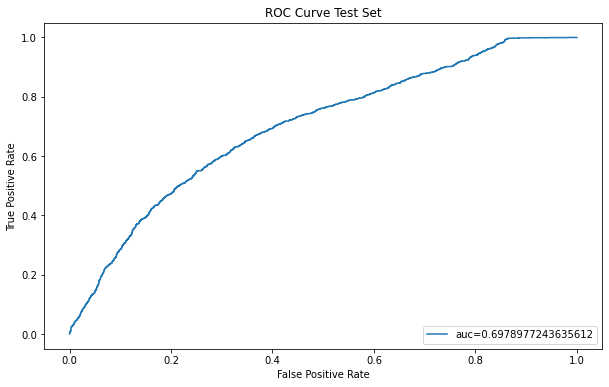

In [271]:
 # Initialize the LR
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [272]:
#x and y train/test no scaling
X_train = df_train_nos.drop(["loan_status"], axis=1).values
y_train = df_train_nos["loan_status"].values

X_test = test_ns.drop(["loan_status"], axis=1).values
y_test = test_ns["loan_status"].values

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.67      0.54      0.59      2351
           1       0.61      0.73      0.67      2351

    accuracy                           0.63      4702
   macro avg       0.64      0.63      0.63      4702
weighted avg       0.64      0.63      0.63      4702

[[1259 1092]
 [ 626 1725]]


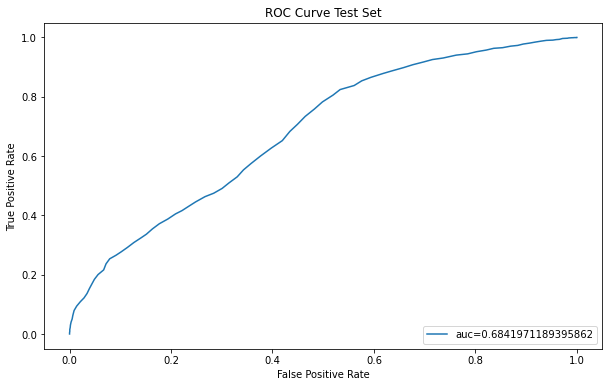

In [273]:
 # Initialize the RF
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [274]:
#create x and y train/test scaled
X_train = df_train_s.drop(["loan_status", "home_ownership_MORTGAGE"], axis=1).values
y_train = df_train_s["loan_status"].values

X_test = test.drop(["loan_status", "home_ownership_MORTGAGE"], axis=1).values
y_test = test["loan_status"].values

In [275]:
#create function
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.69      0.77      0.72      6090
           1       0.74      0.65      0.69      6090

    accuracy                           0.71     12180
   macro avg       0.71      0.71      0.71     12180
weighted avg       0.71      0.71      0.71     12180

[[4674 1416]
 [2139 3951]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2351
           1       0.78      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.78      0.77      0.77      4702
weighted avg       0.78      0.77      0.77      4702

[[1859  492]
 [ 566 1785]]


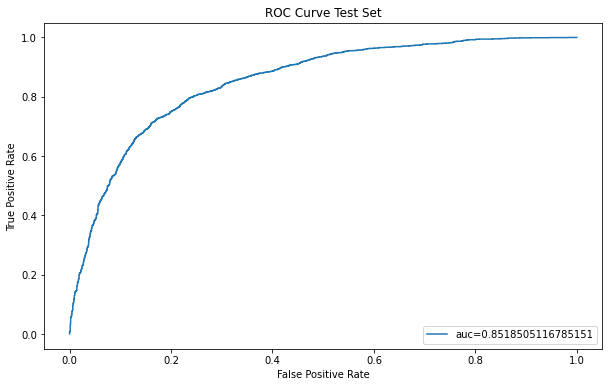

In [276]:
 # Initialize the LR
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [278]:
#create x and y train/test scaled
X_train = df_train_s.drop(["loan_status"], axis=1).values
y_train = df_train_s["loan_status"].values

X_test = test.drop(["loan_status"], axis=1).values
y_test = test["loan_status"].values

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.67      0.54      0.59      2351
           1       0.61      0.73      0.67      2351

    accuracy                           0.63      4702
   macro avg       0.64      0.63      0.63      4702
weighted avg       0.64      0.63      0.63      4702

[[1258 1093]
 [ 625 1726]]


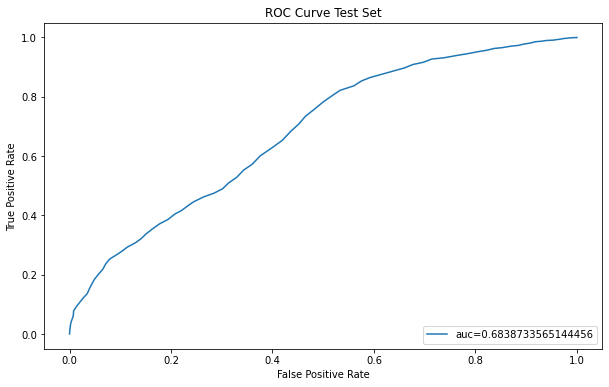

In [279]:
 # Initialize the RF
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

# More Models

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      2351
           1       0.59      0.59      0.59      2351

    accuracy                           0.59      4702
   macro avg       0.59      0.59      0.59      4702
weighted avg       0.59      0.59      0.59      4702

[[1375  976]
 [ 958 1393]]


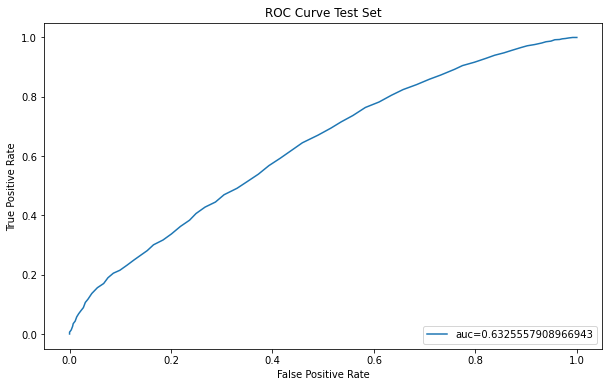

In [280]:
#Extra Trees
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      6090
           1       0.78      0.73      0.76      6090

    accuracy                           0.76     12180
   macro avg       0.77      0.76      0.76     12180
weighted avg       0.77      0.76      0.76     12180

[[4861 1229]
 [1640 4450]]

Testing SET
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2351
           1       0.67      0.71      0.69      2351

    accuracy                           0.68      4702
   macro avg       0.68      0.68      0.68      4702
weighted avg       0.68      0.68      0.68      4702

[[1529  822]
 [ 671 1680]]


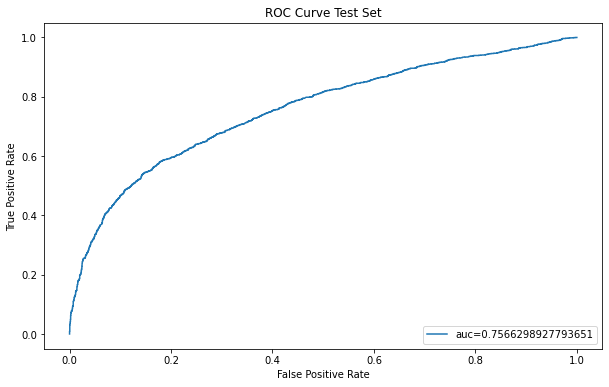

In [281]:
#ada
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6090
           1       0.81      0.78      0.79      6090

    accuracy                           0.80     12180
   macro avg       0.80      0.80      0.80     12180
weighted avg       0.80      0.80      0.80     12180

[[4954 1136]
 [1342 4748]]

Testing SET
              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2351
           1       0.66      0.80      0.73      2351

    accuracy                           0.70      4702
   macro avg       0.71      0.70      0.69      4702
weighted avg       0.71      0.70      0.69      4702

[[1403  948]
 [ 472 1879]]


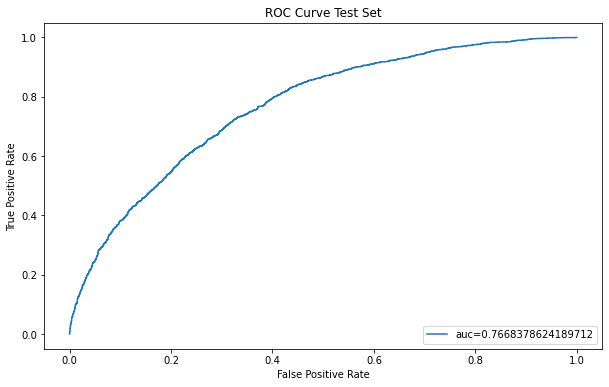

In [282]:
#gb
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6090
           1       0.96      0.95      0.95      6090

    accuracy                           0.96     12180
   macro avg       0.96      0.96      0.96     12180
weighted avg       0.96      0.96      0.96     12180

[[5852  238]
 [ 310 5780]]

Testing SET
              precision    recall  f1-score   support

           0       0.66      0.48      0.56      2351
           1       0.59      0.75      0.66      2351

    accuracy                           0.62      4702
   macro avg       0.62      0.62      0.61      4702
weighted avg       0.62      0.62      0.61      4702

[[1135 1216]
 [ 593 1758]]


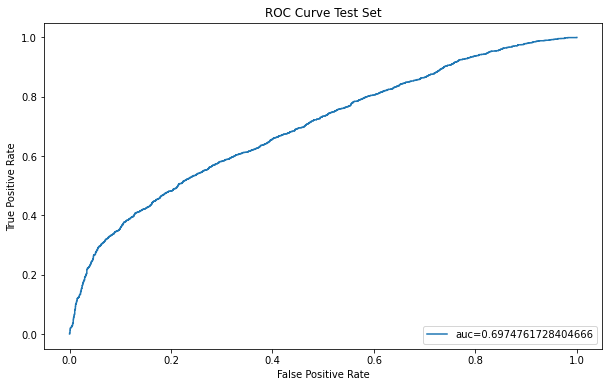

In [283]:
#xgb
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6090
           1       0.88      0.85      0.86      6090

    accuracy                           0.87     12180
   macro avg       0.87      0.87      0.87     12180
weighted avg       0.87      0.87      0.87     12180

[[5392  698]
 [ 923 5167]]

Testing SET
              precision    recall  f1-score   support

           0       0.73      0.48      0.58      2351
           1       0.61      0.82      0.70      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.64      4702
weighted avg       0.67      0.65      0.64      4702

[[1123 1228]
 [ 414 1937]]


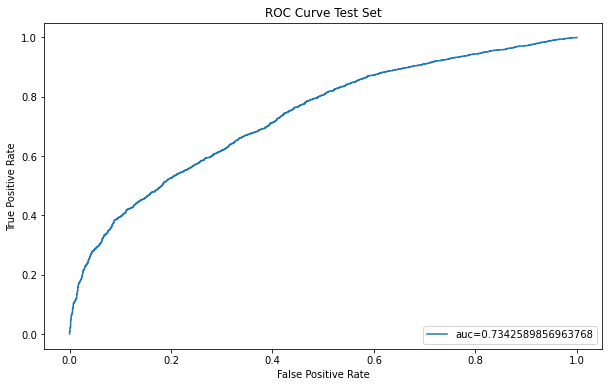

In [284]:
#lgbm
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

In [286]:
#Conclusion: Scaling is beneficial for logisitic regressions, as the scaled data scored an auc of .85 and unscaled was .69.
#Scaling, however does not really affect Randomforest, with both scaled and unscaled models having a .68.
#Overall, the logistic regression was the strongest model.